Task 2

Перші 5 рядків:
   age     sex     bmi  children smoker     region      charges  smoker_num
0   19  female  27.900         0    yes  southwest  16884.92400           1
1   18    male  33.770         1     no  southeast   1725.55230           0
2   28    male  33.000         3     no  southeast   4449.46200           0
3   33    male  22.705         0     no  northwest  21984.47061           0
4   32    male  28.880         0     no  northwest   3866.85520           0
MAE: 4213.80 $
RMSE: 5829.38 $
R2 Score: 0.78

Вплив факторів:
       Фактор          Вага
0         age    257.071158
1         bmi    327.522631
2    children    427.199971
3  smoker_num  23653.211646


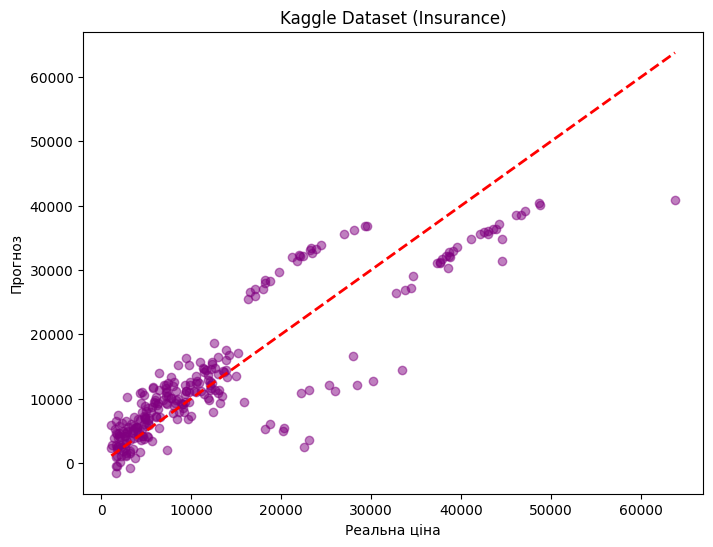

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('insurance.csv')

df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

X = df[['age', 'bmi', 'children', 'smoker_num']]
y = df['charges']

print("Перші 5 рядків:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} $")
print(f"RMSE: {rmse:.2f} $")
print(f"R2 Score: {r2:.2f}")

coef_df = pd.DataFrame({'Фактор': X.columns, 'Вага': model.coef_})
print("\nВплив факторів:")
print(coef_df)

# Візуалізація (Факт vs Прогноз)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальна ціна')
plt.ylabel('Прогноз')
plt.title('Kaggle Dataset (Insurance)')
plt.show()